# Task 1: Statevector simulation of quantum circuits
## Using Matrix Multiplication
### By Heramb Kumar Karil

In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

### Part 1: 
    Taking n-qubits initially at 0 state (|00...0>) as tensor product of n [1,0] vectors giving us 
    vector of length 2^n and then applying all gates as matrix multiplication to the initial state.
    Our final task is to get state vector in more readable form, an example of which is given below using qiskit.

In [2]:
""" Note - Qiskit is used just for an example representation and not for any further calculations. """
import qiskit
from qiskit import QuantumCircuit as QC
from qiskit.quantum_info import Statevector
C =  QC(2)
C.h(0)
C.cx(0,1)
p = Statevector(C)
p.draw("latex")

<IPython.core.display.Latex object>

     Defining fuction "statevector(n)" to convert matrix vector to state vector reprentation   

In [3]:
def statevector(n):
    dict ={}
    count = 0
    if type(n)=="dict":
        n = list(n.values())
    elif isinstance(n, np.ndarray):
        n = n.tolist()
    elif isinstance(n, list):
        k = n[0]
        if len(n) != 1:
            for i in n[1:]:
                k = np.tensordot(k,i, axes = 0).reshape(-1).squeeze()
        n = k
    for i in range(0,len(n)):
        if n[i] != 0:
            j, count = i+1, count + n[i]**2
            t = len(bin(len(n))[2:])-1
            s = bin(j-1)[2:]
            k = "0"*(t-len(s))
            state = k+bin(j-1)[2:]
            dict[state]=float(n[i]**2)
        if abs(count-1) < 10**(-13):
            break
    return dict

In [4]:
""" Initialization """
num_qubits = int(input("Number of Qubits:"))
qubit = np.array([1,0])
num = np.zeros(2**(num_qubits)-2)
qubits = np.concatenate((qubit, num))
qubits

Number of Qubits: 2


array([1., 0., 0., 0.])

In [5]:
""" Defining 1-qubit Not(X), Hadamard(H) Gates and 2-qubit Controled-Not(CNOT) Gate """
X = np.array([[0, 1],
              [1, 0]])

H = np.array([[1,  1],
              [1, -1]]) / np.sqrt(2)

Cnot = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

In [6]:
""" 
    Defining functions to apply single qubit Not(X), Hadamard(H) Gates on "i-th" qubit of the quantum circuit
    and function to implement 2-qubit Controled-Not(CNOT) Gate with "control" as controled and "target" as target qubit.
    
    Note - Here X and H gates are general and they can be implemented independently to any qubit.
           But CNOT gate is such that it will only work if controled qubit is "i" and target is "i+1". 
    """

def X_gate1(state, i):
    num_qubits = int(np.log2(len(state)))
    full_gate = 1
    #creating Matrix to apply X gate on i-th qubit
    for qubit in range(num_qubits):
        if qubit == i:
            full_gate = np.kron(full_gate, X)
        else:
            full_gate = np.kron(full_gate, np.eye(2))
    state = full_gate @ state # Appling X gate to the state using matrix multiplication
    return state

def H_gate1(state, i):
    num_qubits = int(np.log2(len(state)))
    full_gate = 1
    #creating Matrix to apply H gate on i-th qubit
    for qubit in range(num_qubits):
        if qubit == i:
            full_gate = np.kron(full_gate, H)
        else:
            full_gate = np.kron(full_gate, np.eye(2))
    state = full_gate @ state # Appling H gate to the state using matrix multiplication
    return state


def Cnot_gate1(state, control, target):
    num_qubits = int(np.log2(len(state)))
    full_gate = 1
    for i in range(num_qubits):
        if i == control:
            # Apply the 2-qubit CNOT gate between control and target
            full_gate = np.kron(full_gate, Cnot if i + 1 == target else np.eye(2))
        elif i == target:
            continue  # skip this qubit since we already handled it with control
        else:
            full_gate = np.kron(full_gate, np.eye(2))
    
    # Apply the full CNOT gate to the state vector
    state = full_gate @ state 
    return state

In [7]:
    """ Example """
# Initialization
num_qubits = 3
initial_state = np.zeros(2**num_qubits)
initial_state[0] = 1  # |000> state

# Apply X gate on qubit 1
x = X_gate1(initial_state, 0)
# Apply CNOT gate on qubit 1 and 2 
c = Cnot_gate1(x, 0, 1)
# Apply H gate on qubit 2
h = H_gate1(c, 2)
print("State after applying X, H and CNOT Gates:")
print(statevector(h))

State after applying X, H and CNOT Gates:
{'110': 0.4999999999999999, '111': 0.4999999999999999}


In [8]:
""" Getting time to run the code for systems having number of qubits from 1 to 15 (maximum limit)"""
num_qubits = [i for i in range(1,16)]
time_task1 = []
for i in num_qubits:
    start_time = time.time()
    qubit = np.array([1,0])
    num = np.zeros(2**(i)-2)
    qubits = np.concatenate((qubit, num))
    x = X_gate1(qubits, 0)
    h = H_gate1(x, 0)
    c = Cnot_gate1(h, 0, 1) if i != 1  else h
    statevector(c)
    end_time = time.time()
    time_task1.append(end_time - start_time)
time_task1

[0.0,
 0.0,
 0.0,
 0.0010292530059814453,
 0.0,
 0.0009653568267822266,
 0.0009970664978027344,
 0.0029921531677246094,
 0.010001897811889648,
 0.04638981819152832,
 0.14921212196350098,
 0.7615530490875244,
 2.4109113216400146,
 9.40322995185852,
 38.006019592285156]

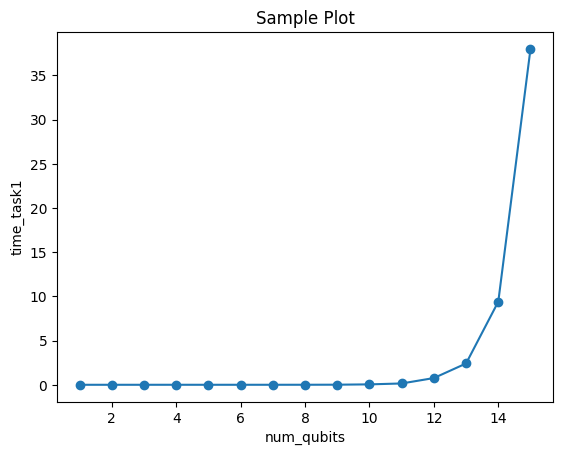

In [9]:

plt.plot(num_qubits, time_task1, marker='o')  # marker='o' adds a circle marker at each point
plt.xlabel("num_qubits")
plt.ylabel("time_task1")
plt.title("Sample Plot")

# Display the plot
plt.show()

### Part 2:
    Taking n-qubits initially at 0 state (|00...0>) as n [1,0] vectors giving us 
    matrix of (2,n) and then applying all gates.

    Finally comparing the run time for both of the methods


In [10]:
""" Redefining the Functions to apply the same gates as before. """
def X_gate2(qc, i):
    M = np.array(qc[i])
    qc[i] = np.tensordot(X, M, axes = 1).tolist()
    # Adjusting the mechine error
    for j in range(0,2):
        if abs(qc[i][j]-1) < 10**(-15):
            qc[i][j] = 1
        elif abs(qc[i][j]-0) < 10**(-15):
            qc[i][j] = 0
        elif abs(qc[i][j]+1) < 10**(-15):
            qc[i][j] = -1
    return qc

def H_gate2(qc, i):
    qc[i] = (H @ qc[i]).tolist()
    # Adjusting the mechine error
    for j in range(0,2):
        if abs(qc[i][j]-1) < 10**(-15):
            qc[i][j] = 1
        elif abs(qc[i][j]-0) < 10**(-15):
            qc[i][j] = 0
        elif abs(qc[i][j]+1) < 10**(-15):
            qc[i][j] = -1
    return qc


def Cnot_gate2(state, control, target):
    num_qubits = int((len(state)))
    if state[control] == [1,0]:
        state[target] = np.eye(2) @ state[target]
    elif state[control] == [0,1]:
        state[target] = X @ state[target]
    else:
        full_state = state[0]
        for qubit in state[1:]:
            full_state = np.tensordot(full_state,qubit, axes=0).reshape(-1).squeeze()
            full_gate = 1
        for i in range(num_qubits):
            if i == control:
                full_gate = np.kron(full_gate, Cnot if i + 1 == target else np.eye(2))
            elif i == target:
                continue  
            else:
                full_gate = np.kron(full_gate, np.eye(2))
        state = full_gate @ full_state 
    return state

In [11]:
# Initialization
num_qubits = int(input("Number of Qubits:"))
qubit = [[1,0]]
qc = qubit*num_qubits
qc

Number of Qubits: 3


[[1, 0], [1, 0], [1, 0]]

In [12]:
x = X_gate2(qc, 0)
h = H_gate2(x, 0)
c = Cnot_gate2(h, 0, 1)
statevector(c)

{'000': 0.4999999999999999, '110': 0.4999999999999999}

In [13]:
""" Getting time to run the code for systems having number of qubits from 1 to 15"""
num_qubits = [i for i in range(1,16)]
time_task2 = []
for i in num_qubits:
    start_time = time.time()
    qubit = [[1,0]]
    qubits = qubit*i
    x = X_gate2(qubits, 0)
    h = H_gate2(x, 0)
    c = Cnot_gate2(h, 0, 1) if i != 1  else h
    statevector(c)
    end_time = time.time()
    time_task2.append(end_time - start_time)
time_task2

[0.0,
 0.0006368160247802734,
 0.0,
 0.0010919570922851562,
 0.0,
 0.0,
 0.0009500980377197266,
 0.0011219978332519531,
 0.0030395984649658203,
 0.013052940368652344,
 0.056403398513793945,
 0.20189666748046875,
 0.762627363204956,
 3.115339517593384,
 12.702986001968384]

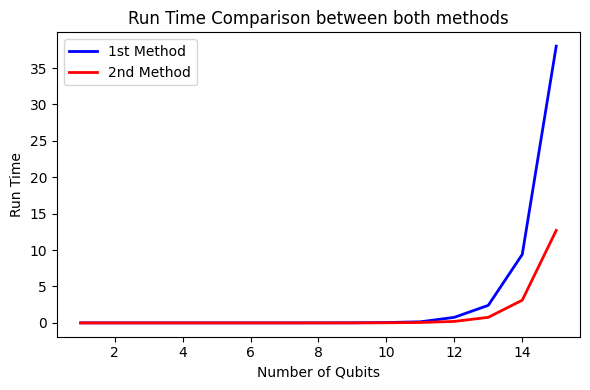

In [14]:
x = num_qubits
y1 = time_task1
y2 = time_task2

plt.figure(figsize=(6, 4))

plt.plot(x, y1, color='blue', label='1st Method', linewidth=2)

plt.plot(x, y2, color='red', label='2nd Method', linewidth=2)

plt.title("Run Time Comparison between both methods")
plt.xlabel("Number of Qubits")
plt.ylabel("Run Time")
plt.legend()
# Display both subplots
plt.tight_layout()
plt.show()

In [15]:
""" Getting time to run the code for systems having number of qubits from 1 to 15"""
num_qubits = [i for i in range(1,16)]
time_task3 = []
time_task4 = []

for i in num_qubits:
    start_time = time.time()
    qubit = np.array([1,0])
    num = np.zeros(2**(i)-2)
    qubits = np.concatenate((qubit, num))
    for j in range(0,int(np.log2(i))+1):
        x = X_gate1(qubits, j)
        h = H_gate1(x, j)
    c = Cnot_gate1(h, 0, 1) if i != 1  else h
    statevector(c)
    end_time = time.time()
    time_task3.append(end_time - start_time)

for i in num_qubits:
    start_time = time.time()
    qubit = [[1,0]]
    qubits = qubit*i
    for j in range(0,int(np.log2(i))+1):
        x = X_gate2(qubits, j)
        h = H_gate2(x, j)
    c = Cnot_gate2(h, 0, 1) if i != 1  else h
    statevector(c)
    end_time = time.time()
    time_task4.append(end_time - start_time)

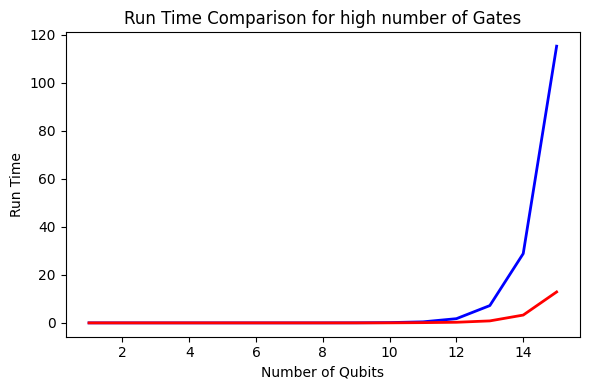

In [16]:
x = num_qubits
y1 = time_task3
y2 = time_task4

plt.figure(figsize=(6, 4))

plt.plot(x, y1, color='blue', label='1st Method', linewidth=2)

plt.plot(x, y2, color='red', label='2nd Method', linewidth=2)

plt.title("Run Time Comparison for high number of Gates")
plt.xlabel("Number of Qubits")
plt.ylabel("Run Time")

# Display both subplots
plt.tight_layout()
plt.show()

### 
    We can see that the run time increases exponentilly with addition of each qubit,
    as well as with implimentation of each gate.

### Simulation of quantum circuit outcome after measurement 

In [17]:
""" Defining Fuction to simulate_experiment from given probability dictionary
    (the statevector fuctions returns the same) "n" number of times.
    
    This function returns a dictionary with keys as possible outcomes 
    and number of times it occures as its corresponding values.    """

def simulate_experiment(prob_dist, n):
    outcomes = list(prob_dist.keys())
    probabilities = list(prob_dist.values())
    # Simulate the experiment n times
    simulations = np.random.choice(outcomes, size=n, p=probabilities)
    outcome_counts = {outcome: np.sum(simulations == outcome) for outcome in outcomes}
    return outcome_counts

In [18]:
    """ Example """
# Initialization
num_qubits = int(input("Number of Qubits:"))
qubit = [[1,0]]
qc = qubit*num_qubits
x = X_gate2(qc, 0)
h = H_gate2(qc, 0)
h1 = H_gate2(h, 2)
c = Cnot_gate2(h1, 0, 1)
statevector(c)

Number of Qubits: 3


{'000': 0.2499999999999999,
 '001': 0.2499999999999999,
 '110': 0.2499999999999999,
 '111': 0.2499999999999999}

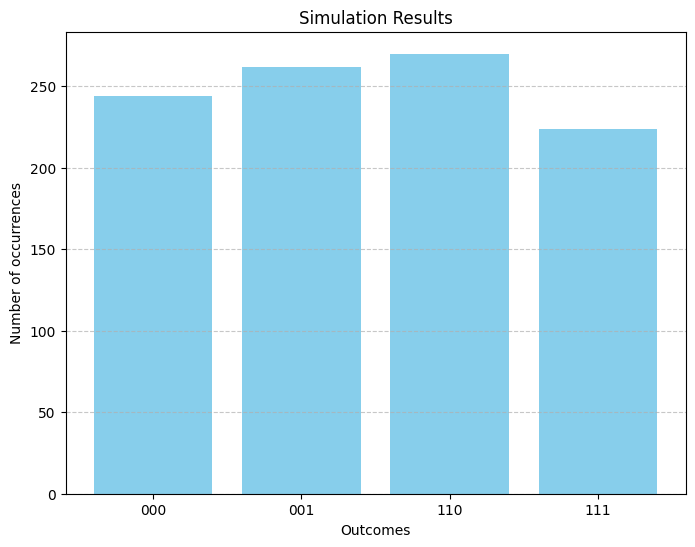

In [19]:
""" Simulate the experiment """
# Number of simulations
n = 1000
prob_dist = statevector(c)
outcome_counts = simulate_experiment(prob_dist, n)

# Plot the results
outcomes = list(outcome_counts.keys())
counts = list(outcome_counts.values())
    
    # Plotting
plt.figure(figsize=(8, 6))
plt.bar(outcomes, counts, color='skyblue')
plt.xlabel("Outcomes")
plt.ylabel("Number of occurrences")
plt.title("Simulation Results")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()